# Introduction to GeoPandas
This notebook provides an introduction to GeoPandas, covering:
- Loading and exploring geospatial data
- Filtering and selecting data
- Performing geometric operations (dissolve, clip, buffer)
- Creating a new GeoDataFrame
- Saving GeoDataFrames to various formats

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Load and Explore Data

In [2]:
# Load the built-in natural earth dataset (low-resolution world map)
path = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(path)

<Axes: >

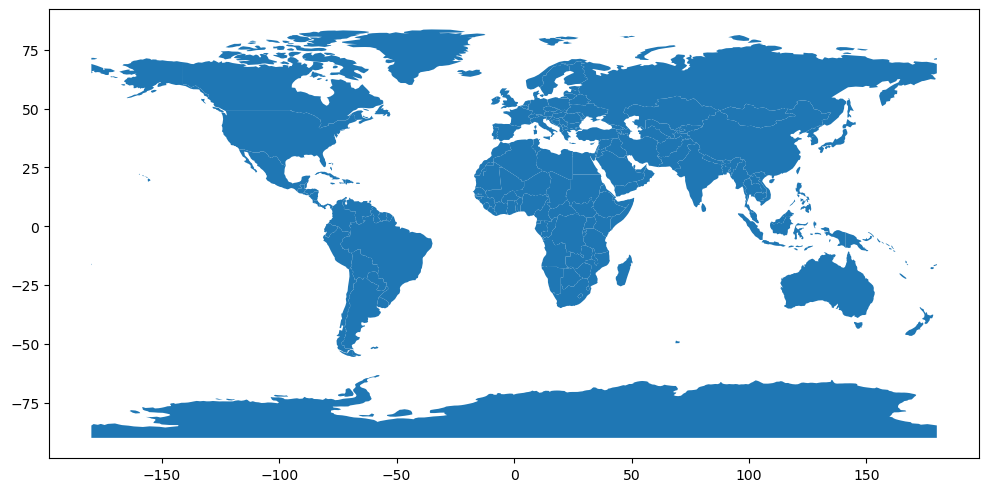

In [3]:
# Plot the dataset
gdf.plot(figsize=(12, 8))

In [4]:
# Interactive visualization using folium-based explore function
gdf.explore()

## Filter and Select Data

<Axes: >

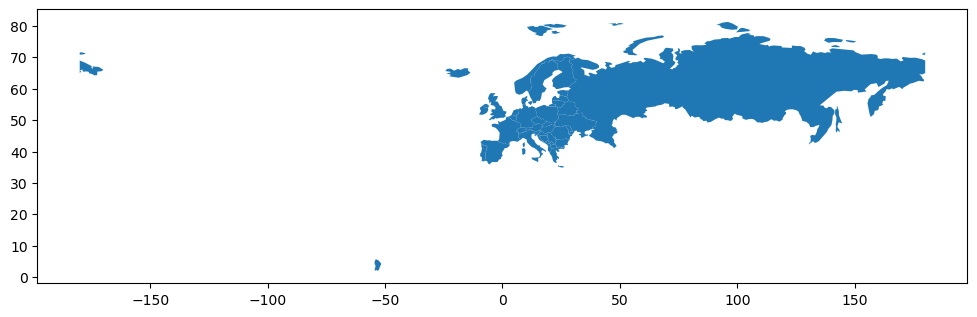

In [5]:
# Select countries in Europe and plot them
query = gdf[gdf['continent'] == 'Europe']
query.plot(figsize=(12, 8))

In [6]:
# Apply multiple filters
# Select countries in Africa with a population greater than 20 million and names containing 'A'
filtered = gdf[
    (gdf['continent'] == 'Africa') &
    (gdf['pop_est'] > 20000000) &
    (gdf['name'].str.contains('A', case=False))
]
filtered.explore()

## Geometric Operations

In [7]:
# Dissolve: Merge geometries by continent
gdf_dissolved = gdf.dissolve(by='continent')
gdf_dissolved.explore()

In [8]:
# Clip: Extract cities located within Africa
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
africa = gdf[gdf['continent'] == "Africa"]
africa_cities = cities.clip(africa)
africa_cities.explore()

/tmp/ipykernel_7656/704280688.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities_buffer = africa_cities.buffer(5)


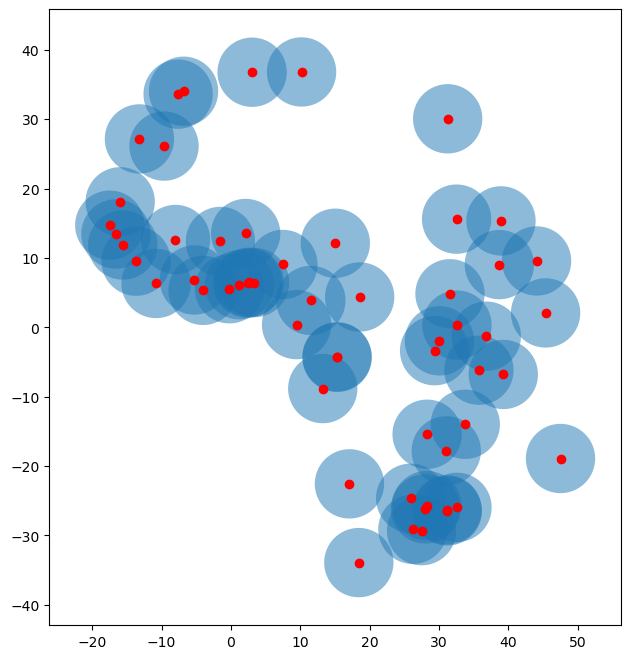

In [9]:
# Buffer: Create a buffer of 5 degrees around African cities
fig, ax = plt.subplots(figsize=(12, 8))
cities_buffer = africa_cities.buffer(5)
cities_buffer.plot(ax=ax, alpha=0.5)
africa_cities.plot(ax=ax, color='red')
plt.show()

## Creating a GeoDataFrame

<Axes: >

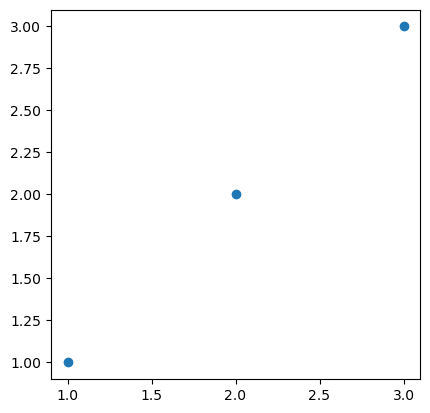

In [10]:
# Define point geometries
point1, point2, point3 = Point(1, 1), Point(2, 2), Point(3, 3)

data = {
    'name': ['Point 1', 'Point 2', 'Point 3'],
    'desc': ['Description 1', 'Description 2', 'Description 3'],
    'geometry': [point1, point2, point3]
}

gdf_new = gpd.GeoDataFrame(data)
gdf_new.plot()

## Saving GeoDataFrame to different formats

In [11]:
output_dir = os.path.join(os.getcwd(), 'output', '01_output')
shp_dir = os.path.join(output_dir, 'shp')
os.makedirs(shp_dir, exist_ok=True)

In [12]:
# Define file paths
shp_name = os.path.join(shp_dir, 'shapefile.shp')
gpkg_name = os.path.join(output_dir, 'geopackage.gpkg')
geojson_name = os.path.join(output_dir, 'geojson.geojson')

In [13]:
# Save data in different formats
gdf_new.to_file(shp_name, driver='ESRI Shapefile')
gdf_new.to_file(gpkg_name, driver='GPKG')
gdf_new.to_file(geojson_name, driver='GeoJSON')